# Lotka-Volterra Model

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
init = State(w = 1, e = 1)

,values
w,1
e,1


In [8]:
system = System (a = 0.05, b = 0.1, g = 0.1, d = 0.1, t0 = 0, t_end = 200)

,values
a,0.05
b,0.10
g,0.10
d,0.10
t0,0.00
t_end,200.00


In [9]:
def update_func(state, t, system):
    elkPop = state.e
    wolfPop = state.w
    
    elkPop += (system.a * elkPop - system.b * elkPop * wolfPop)
    wolfPop += (system.d * wolfPop * elkPop - system.g * wolfPop) 
    
    return State(w = wolfPop, e = elkPop)

In [10]:
def run_simulation(system, update_func, init):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [11]:
def plot_results(w, e):
    plot(w, '--', label='Wolves')
    plot(e, '-', label='Elk')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

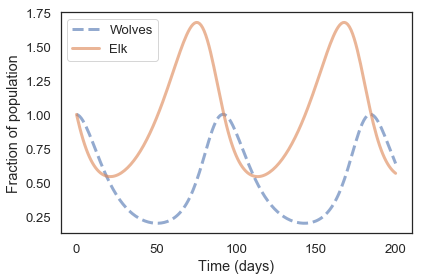

In [12]:
results = run_simulation(system, update_func, init)
plot_results(results.w, results.e)